In [1]:
pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 3.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 3.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
from sklearn.linear_model import LinearRegression, BayesianRidge, TweedieRegressor, LassoLars
from sklearnex.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

# For Data Processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearnex.model_selection import train_test_split 

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Miscellaneous
import os
import random
import math


In [3]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df.describe()[1:][['age','children','bmi', 'expenses']].T.style.background_gradient(cmap=sns.light_palette("#ea4335", as_cmap=True), axis=1)

,mean,std,min,25%,50%,75%,max
age,39.207025,14.049960,18.000000,27.000000,39.000000,51.000000,64.000000
children,1.094918,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000
bmi,30.665471,6.098382,16.000000,26.300000,30.400000,34.700000,53.100000
expenses,13270.422414,12110.011240,1121.870000,4740.287500,9382.030000,16639.915000,63770.430000


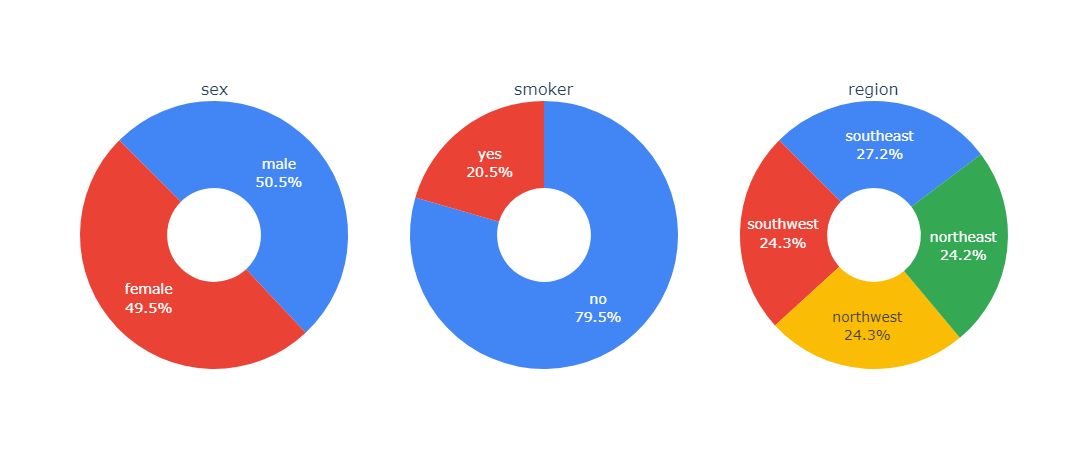

In [7]:
fig = make_subplots(
    rows=1, cols=3, subplot_titles=("sex", "smoker",
                                    "region"),
    specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(df['sex'].value_counts().index),
                     values=[x for x in df['sex'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df['smoker'].value_counts().index),
                     values=[x for x in df['smoker'].value_counts()],
                     textinfo='label+percent', hole=.35,
                     marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df['region'].value_counts().index),
                     values=[x for x in df['region'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
              row=1, col=3)


fig.update_layout(height=450, font=dict(size=14), showlegend=False)

fig.show()

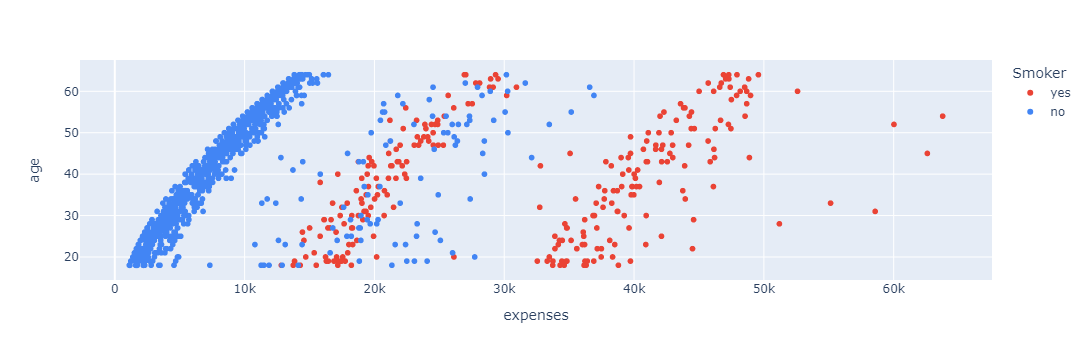

In [8]:
fig = px.scatter(df, x="expenses", y="age", color='smoker', color_continuous_scale='Blues', color_discrete_map={'yes':'#ea4335', 'no':'#4285f4'})
fig.update_layout(legend_title_text='Smoker')


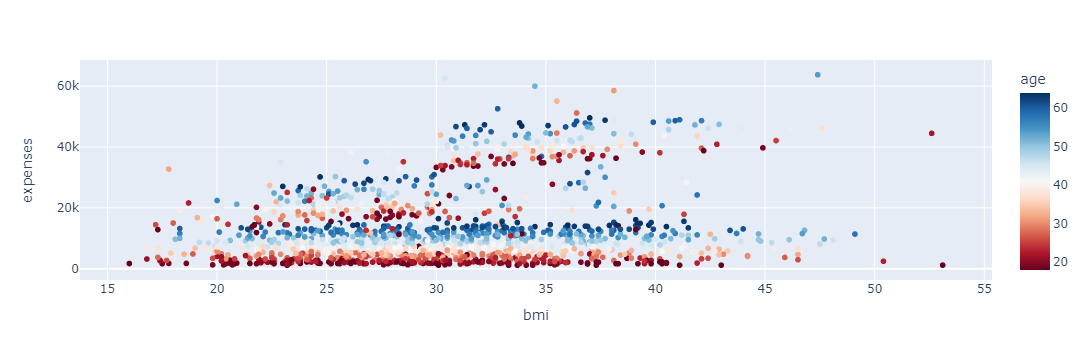

In [9]:
fig = px.scatter(df, x="bmi", y="expenses", color='age', color_continuous_scale='RdBu')
fig.show()

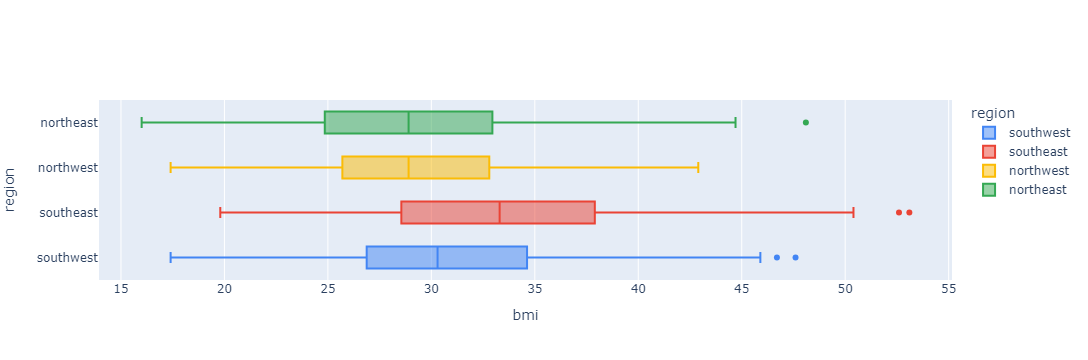

In [10]:
fig = go.Figure()
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
for i,x in enumerate(df['region'].unique()):
    fig.add_trace(go.Box(
        x=df[df['region']==x]['bmi'],
        y=df[df['region']==x]['region'], name=x, marker_color=colors[i]
    ))

fig.update_layout(
    yaxis_title='region', xaxis_title='bmi'
)
fig.update_traces(orientation='h')
fig.update_layout(legend_title_text='region')
fig.show()


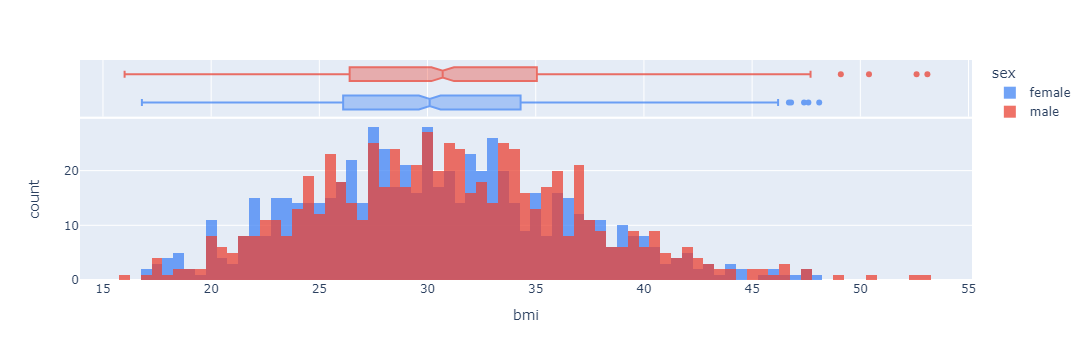

In [11]:
fig = px.histogram(df, x="bmi", color="sex", marginal='box', nbins=80, color_discrete_map = {'male':'#ea4335','female':'#4285f4'})
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

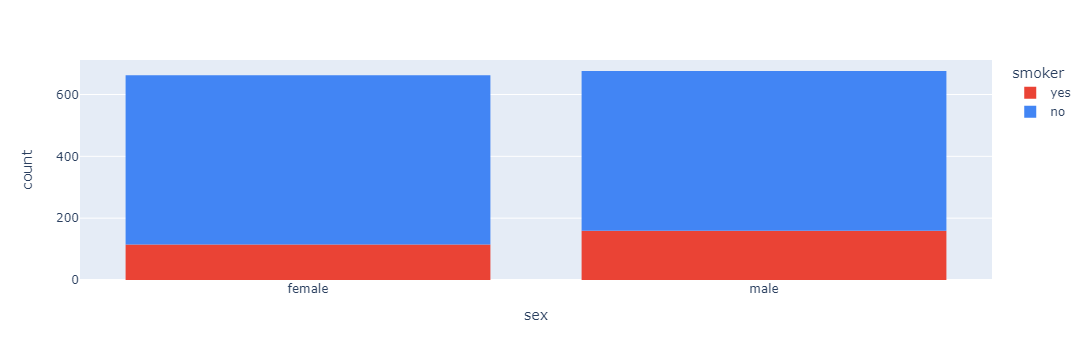

In [12]:
fig = px.histogram(df, x="sex", color='smoker', color_discrete_map = {'yes':'#ea4335','no':'#4285f4'})
fig.show()

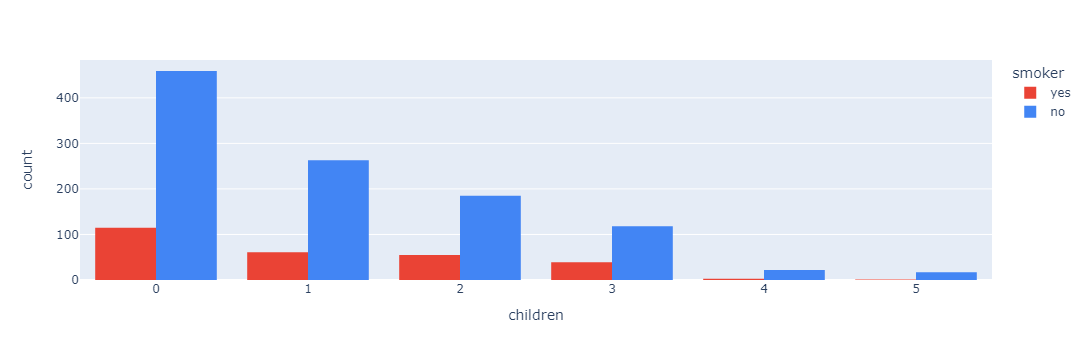

In [13]:
fig = px.histogram(df, x="children", color='smoker', barmode='group', color_discrete_map = {'yes':'#ea4335','no':'#4285f4'})
fig.show()

In [14]:
print('\nCategorical Columns\n')
df.select_dtypes(include=['O']).nunique()


Categorical Columns



sex       2
smoker    2
region    4
dtype: int64

In [15]:
for col in ['sex', 'smoker']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
# One-hot encode columns with more than 2 unique values
df = pd.get_dummies(df, columns=['region'], prefix = ['region'])

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [16]:
features = np.array(df[[col for col in df.columns if col!='expenses']])
labels = np.array(df['expenses'])

x_train, x_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=0)

In [17]:
model_comparison = {}

In [18]:
rf = RandomForestRegressor()

parameters = {'n_estimators': [160,180,200,220], 'max_depth':[16,18,20,22,24]}
clf = GridSearchCV(rf, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_val)

rmse = math.sqrt(mean_squared_error(y_val,y_pred))
mape = mean_absolute_percentage_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print('\nRMSE:', rmse)
print('MAPE:', mape)
print('R2 Score:', r2)

model_comparison['RandomForestRegressor'] = [rmse, mape, r2]

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 16, 'n_estimators': 200}

RMSE: 4348.950808697991
MAPE: 0.33409142102058176
R2 Score: 0.8811451169503505


In [19]:
lr = LinearRegression().fit(x_train, y_train)

y_pred = lr.predict(x_val)

rmse = math.sqrt(mean_squared_error(y_val,y_pred))
mape = mean_absolute_percentage_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print('\nRMSE:', rmse)
print('MAPE:', mape)
print('R2 Score:', r2)

model_comparison['LinearRegression'] = [rmse, mape, r2]


RMSE: 5641.193519411496
MAPE: 0.39500904596189984
R2 Score: 0.8000184017333829


In [20]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

y_pred = tree.predict(x_val)

rmse = math.sqrt(mean_squared_error(y_val,y_pred))
mape = mean_absolute_percentage_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print('\nRMSE:', rmse)
print('MAPE:', mape)
print('R2 Score:', r2)

model_comparison['DecisionTreeRegressor'] = [rmse, mape, r2]


RMSE: 6778.73359242867
MAPE: 0.39983990541310105
R2 Score: 0.7112345892351501


In [21]:
br = BayesianRidge().fit(x_train, y_train)

y_pred = br.predict(x_val)

rmse = math.sqrt(mean_squared_error(y_val,y_pred))
mape = mean_absolute_percentage_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print('\nRMSE:', rmse)
print('MAPE:', mape)
print('R2 Score:', r2)

model_comparison['BayesianRidge'] = [rmse, mape, r2]


RMSE: 5643.860549902356
MAPE: 0.3961883897567757
R2 Score: 0.7998292633540649


In [22]:
model_comparison_df = pd.DataFrame.from_dict(model_comparison).T
model_comparison_df.columns = ['MSE', 'MAPE', 'R2 Score']
model_comparison_df = model_comparison_df.sort_values('R2 Score', ascending=True)

model_comparison_df.style.background_gradient(cmap=sns.light_palette("#ea4335", as_cmap=True))

,MSE,MAPE,R2 Score
DecisionTreeRegressor,6778.733592,0.399840,0.711235
BayesianRidge,5643.860550,0.396188,0.799829
LinearRegression,5641.193519,0.395009,0.800018
RandomForestRegressor,4348.950809,0.334091,0.881145


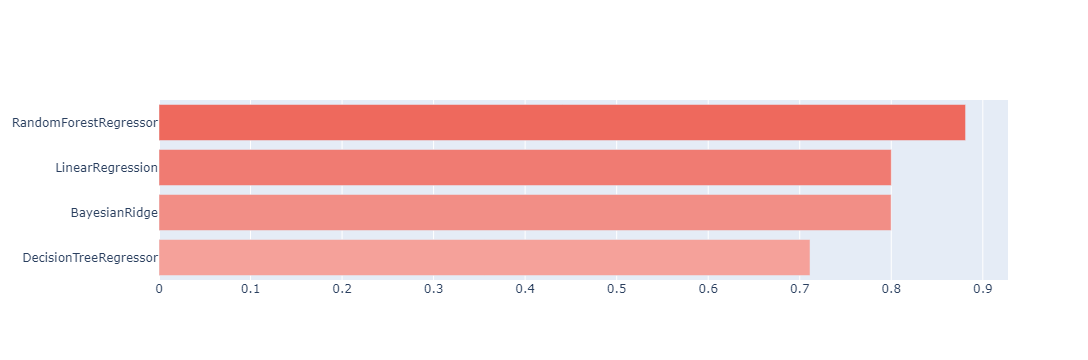

In [23]:
fig = go.Figure(data=[
    go.Bar(name='R2 Score', y=model_comparison_df.index, x=model_comparison_df['R2 Score'],
           orientation='h', marker_color=['#f5a19a', '#f28e86', '#f07b72', '#ee695d', '#ec5649', '#ea4335'])
])
fig.update_layout(barmode='group')
fig.show()